# Telecom Customer Churn Prediction

This project focuses on analyzing and predicting customer churn for a telecom company using real-world data. **Customer churn** refers to the phenomenon where customers stop using a company's services. Reducing churn is crucial for telecom businesses, as acquiring new customers is often more expensive than retaining existing ones.

## Business Context
Telecom companies offer a variety of services such as phone, internet, and streaming. Understanding why customers leave helps companies:
- Improve customer satisfaction
- Develop targeted retention strategies
- Increase profitability by reducing churn rates

## Dataset Description
The dataset contains detailed information about each customer, including:
- **Churn**: Whether the customer left in the last month (target variable)
- **Services Signed Up**: Phone, multiple lines, internet, online security, online backup, device protection, tech support, streaming TV, and streaming movies
- **Account Information**: Tenure (how long a customer has been with the company), contract type, payment method, paperless billing, monthly charges, and total charges
- **Demographics**: Gender, age range, partner status, and dependents

## Project Objectives
- Explore and visualize the data to identify patterns and trends
- Preprocess and prepare the data for modeling
- Build and evaluate machine learning models to predict customer churn
- Identify key factors that influence churn
- Provide actionable insights for business decision-making

## Why This Matters
By accurately predicting which customers are likely to churn, telecom companies can proactively engage at-risk customers with personalized offers or support, ultimately improving retention and business performance.

**Inspiration:**
This project is an opportunity to apply data science techniques to a real-world business problem, gain insights into customer behavior, and learn about predictive modeling for customer retention.

# CRISP-DM Methodology Overview

This notebook follows the **CRISP-DM** (Cross-Industry Standard Process for Data Mining) methodology, a widely used framework for data science projects. The phases are:

1. **Business Understanding**: Define project objectives and requirements from a business perspective.
2. **Data Understanding**: Collect, describe, and explore the data.
3. **Data Preparation**: Clean, transform, and prepare data for modeling.
4. **Modeling**: Apply machine learning algorithms and build predictive models.
5. **Evaluation**: Assess model performance and validate results.
6. **Deployment/Next Steps**: (Optional) Plan for model deployment or further actions.



Data Understanding

**Objective:**
Familiarize with the dataset, perform initial exploration, and identify data quality issues or patterns relevant to churn prediction.

In [674]:
# Import only required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from the directory
df = pd.read_csv('data/Telco-Customer-Churn.csv')

In [675]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Output Analysis
The first five rows of the dataset are displayed here. This allows you to visually inspect the data for obvious issues such as missing values, unexpected data types, or formatting problems. It also helps confirm that the data was loaded correctly and provides a preview of the features and target variable.

In [676]:
#Check the shape of the dataset and information about the dataset
print("Shape of the dataset:", df.shape)
print("\nInformation about the dataset:")
print(df.info())

Shape of the dataset: (7043, 21)

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 n

### Output Analysis
This output provides the shape of the dataset (number of rows and columns) and detailed information about each column, including data types and non-null counts. This helps identify missing values, categorical vs. numerical features, and any potential data quality issues that need to be addressed before modeling.

In [677]:
#Chekk for missing values in the dataset
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


### Output Analysis
This output shows the number of missing values in each column. Columns with non-zero missing values may require imputation, removal, or special handling during data cleaning. Identifying missing data early is crucial for robust preprocessing.

In [678]:
#Check the columns in the dataset
print("\nColumns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


### Output Analysis
This output lists all column names in the dataset. Reviewing the column names helps confirm the available features and target variable, and is useful for planning feature engineering and model input selection.

# DATA EXPLORATION 

C:\Users\Owner\AppData\Local\Temp\ipykernel_23864\3917524683.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




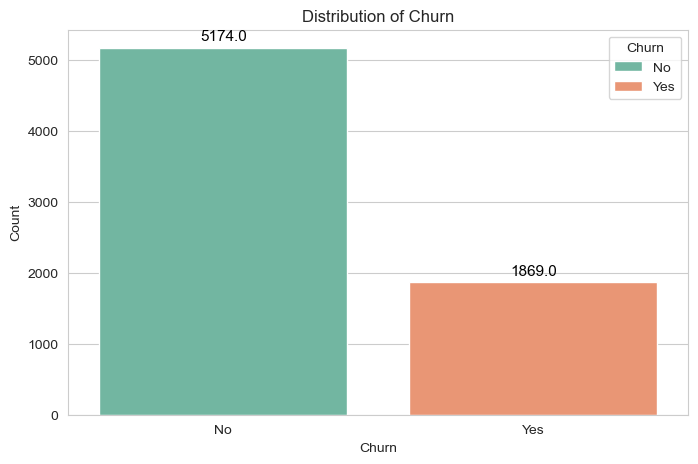

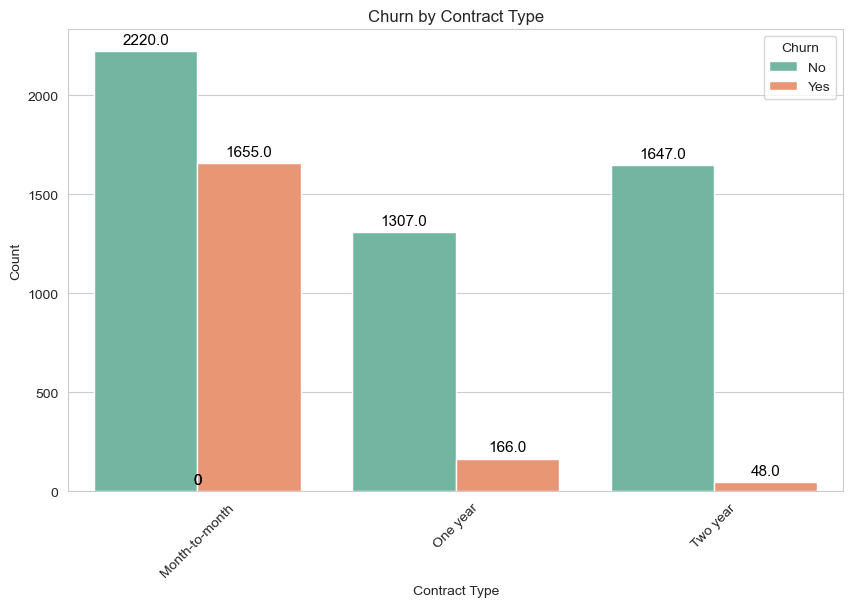

In [679]:
# Data exploration
# Visualize the distribution of the target variable 'Churn'
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df, palette='Set2')
plt.title('Distribution of Churn')
# Add labels on top of bars
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 3), textcoords='offset points')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(['No', 'Yes'], title='Churn')
plt.show()

# Visualize the distribution of 'Churn' by 'Contract'
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right', labels=['No', 'Yes'])

# Add labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 3), textcoords='offset points')


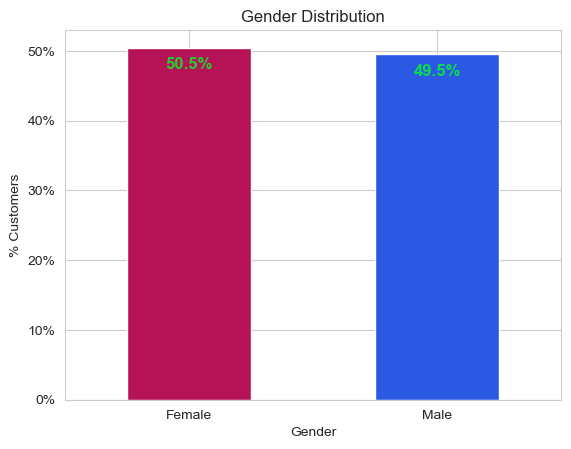

In [714]:
import matplotlib.ticker as mtick

colors = ["#B61256", "#2B59E4"]
ax = (df['gender'].value_counts(normalize=True) * 100).plot(
    kind='bar',
    stacked=True,
    rot=0,
    color=colors
)
# Set y-axis to percentage format
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')
ax.set_xticklabels(['Female', 'Male'])

# Add percentage labels on bars
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() - 3.5,
        f"{p.get_height():.1f}%",
        ha='center',
        va='bottom',
        fontsize=12,
        color="#00FF26CB",  # Changed to gold color
        weight='bold'
    )

plt.show()

### Gender - The churn percent is almost equal in case of Male and Females
The percent of churn is higher in case of senior citizens
Customers with Partners and Dependents have lower churn rate as compared to those who don't have partners & Dependents.

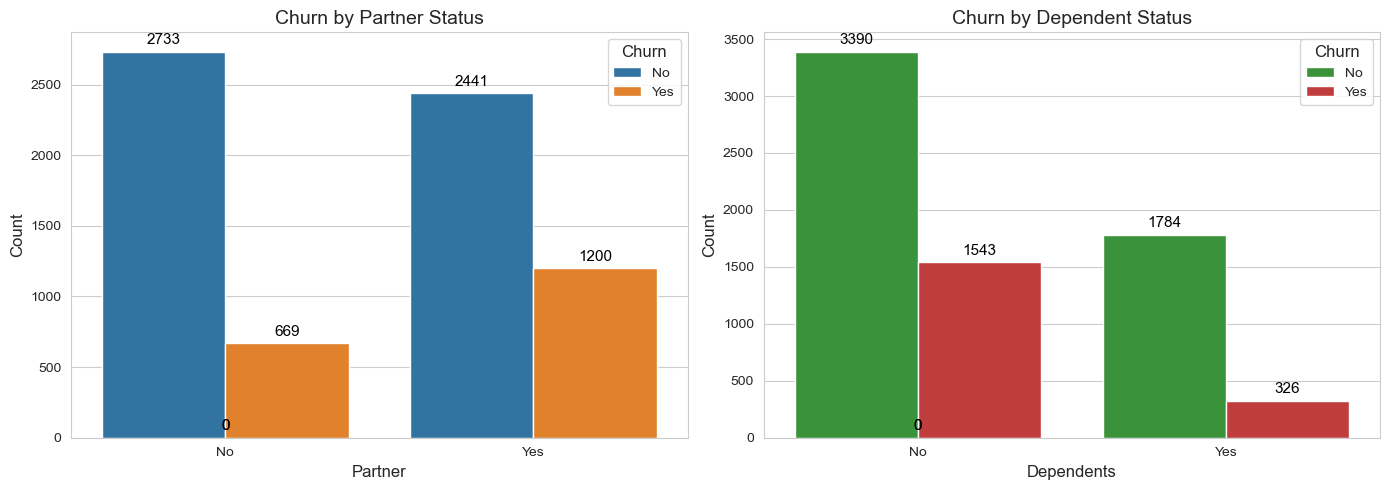

In [681]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent color palette
partner_colors = ['#1f77b4', '#ff7f0e']  # blue, orange
dependent_colors = ['#2ca02c', '#d62728']  # green, red

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Partner status plot
sns.countplot(x='Partner', hue='Churn', data=df, palette=partner_colors, ax=axes[0])
axes[0].set_title('Churn by Partner Status', fontsize=14)
axes[0].set_xlabel('Partner', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['No', 'Yes'])
axes[0].legend(title='Churn', labels=['No', 'Yes'], fontsize=10, title_fontsize=12)

# Annotate Partner plot bars
for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 3), textcoords='offset points')

# Dependents status plot
sns.countplot(x='Dependents', hue='Churn', data=df, palette=dependent_colors, ax=axes[1])
axes[1].set_title('Churn by Dependent Status', fontsize=14)
axes[1].set_xlabel('Dependents', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['No', 'Yes'])
axes[1].legend(title='Churn', labels=['No', 'Yes'], fontsize=10, title_fontsize=12)

# Annotate Dependents plot bars
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{int(height)}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=11, color='black', xytext=(0, 3), textcoords='offset points')

plt.tight_layout()
plt.show()


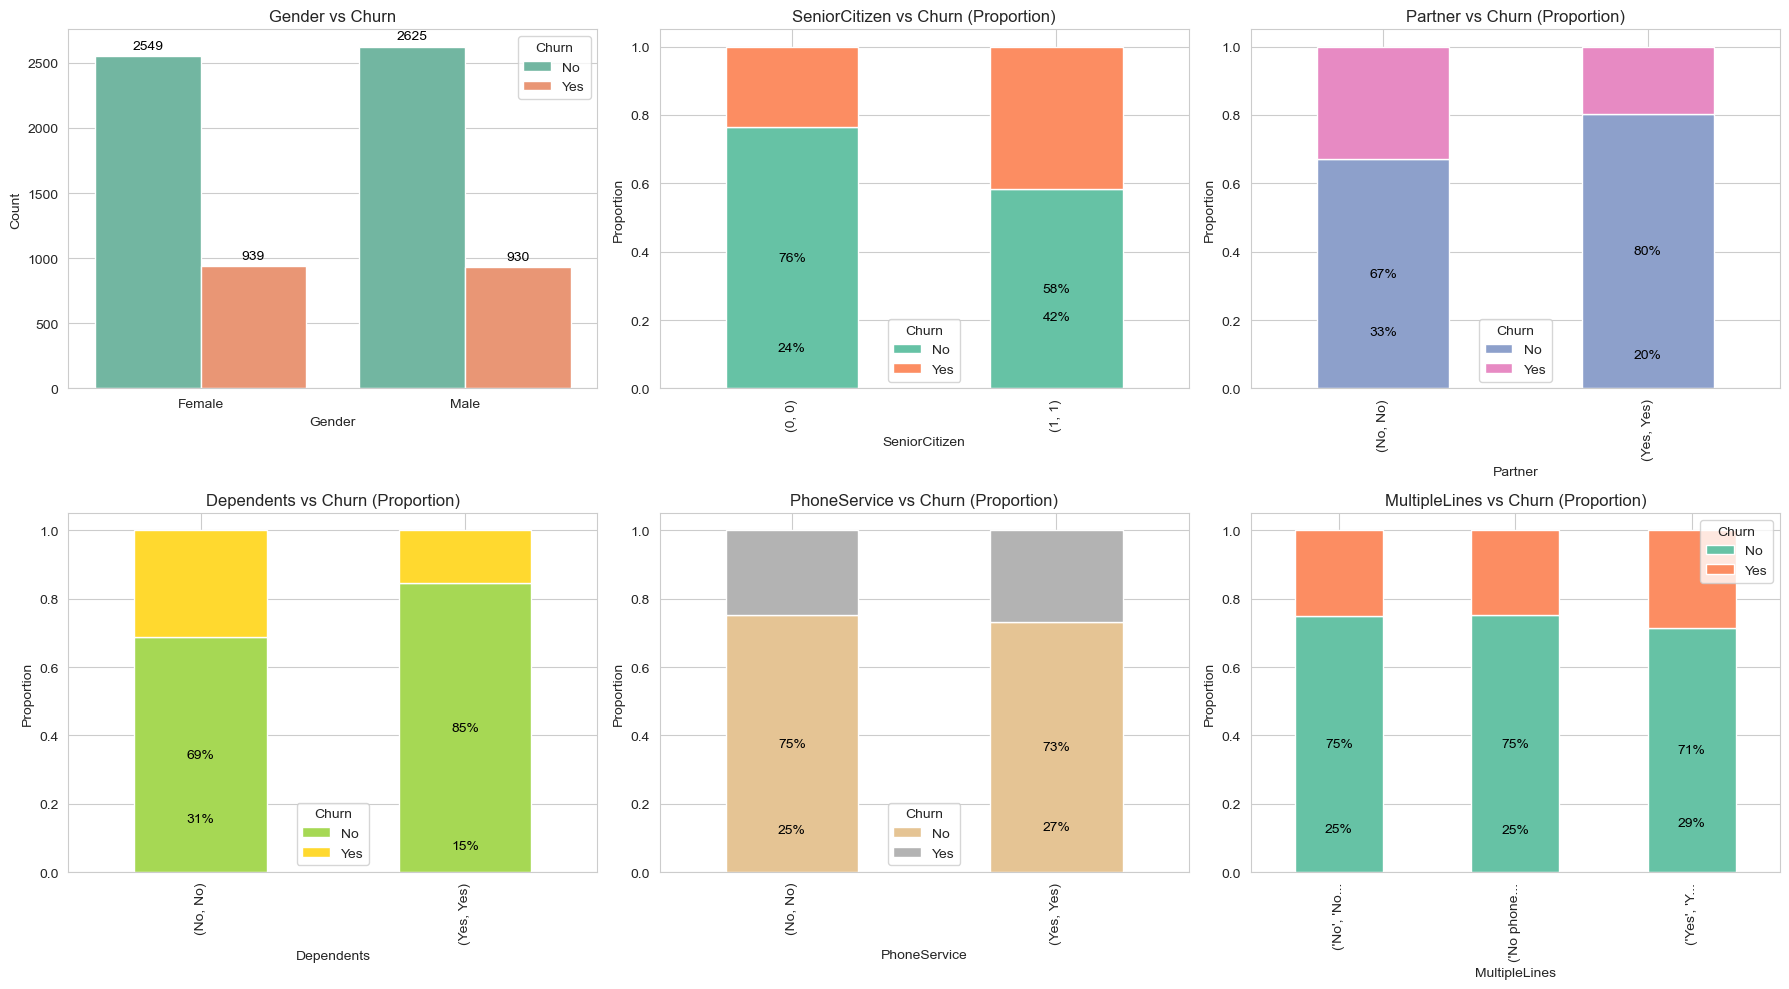

In [682]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 10))

# 1. Gender vs Churn (count)
plt.subplot(2, 3, 1)
sns.countplot(x='gender', hue='Churn', data=df, palette='Set2')
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')

# Helper function to add labels on stacked barplot
def add_labels(ax):
    for p in ax.patches:
        width = p.get_width()
        height = p.get_height()
        x = p.get_x()
        if height > 0:
            ax.annotate(f'{height:.0%}', 
                        (x + width/2., height - (height/2)), 
                        ha='center', va='center', color='black', fontsize=10)

# 2. SeniorCitizen vs Churn (proportion)
plt.subplot(2, 3, 2)
senior_prop = df.groupby(['SeniorCitizen', 'Churn']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()
ax2 = senior_prop.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#66c2a5', '#fc8d62'])
plt.title('SeniorCitizen vs Churn (Proportion)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Proportion')
plt.legend(title='Churn')
add_labels(ax2)

# 3. Partner vs Churn (proportion)
plt.subplot(2, 3, 3)
partner_prop = df.groupby(['Partner', 'Churn']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()
ax3 = partner_prop.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#8da0cb', '#e78ac3'])
plt.title('Partner vs Churn (Proportion)')
plt.xlabel('Partner')
plt.ylabel('Proportion')
plt.legend(title='Churn')
add_labels(ax3)

# 4. Dependents vs Churn (proportion)
plt.subplot(2, 3, 4)
dependents_prop = df.groupby(['Dependents', 'Churn']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()
ax4 = dependents_prop.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#a6d854', '#ffd92f'])
plt.title('Dependents vs Churn (Proportion)')
plt.xlabel('Dependents')
plt.ylabel('Proportion')
plt.legend(title='Churn')
add_labels(ax4)

# 5. PhoneService vs Churn (proportion)
plt.subplot(2, 3, 5)
phoneservice_prop = df.groupby(['PhoneService', 'Churn']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()
ax5 = phoneservice_prop.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#e5c494', '#b3b3b3'])
plt.title('PhoneService vs Churn (Proportion)')
plt.xlabel('PhoneService')
plt.ylabel('Proportion')
plt.legend(title='Churn')
add_labels(ax5)

# 6. MultipleLines vs Churn (proportion)
plt.subplot(2, 3, 6)
if 'MultipleLines' in df.columns:
    multiplelines_prop = df.groupby(['MultipleLines', 'Churn']).size().groupby(level=0).apply(lambda x: x / x.sum()).unstack()
    ax6 = multiplelines_prop.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#66c2a5', '#fc8d62'])
    plt.title('MultipleLines vs Churn (Proportion)')
    plt.xlabel('MultipleLines')
    plt.ylabel('Proportion')
    plt.legend(title='Churn')
    # Add labels on top of bars for Gender vs Churn
    if ax := plt.gcf().axes[0]:
        for p in ax.patches:
            height = p.get_height()
            if height > 0:
                ax.annotate(f'{int(height)}', 
                            (p.get_x() + p.get_width() / 2., height),
                            ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
    add_labels(ax6)
    # Clean long labels if needed
    ax6.set_xticklabels([str(label)[:10] + ('...' if len(str(label)) > 10 else '') for label in multiplelines_prop.index])
else:
    plt.text(0.5, 0.5, 'MultipleLines column not available after encoding', 
             ha='center', va='center', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()


C:\Users\Owner\AppData\Local\Temp\ipykernel_23864\3914234121.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




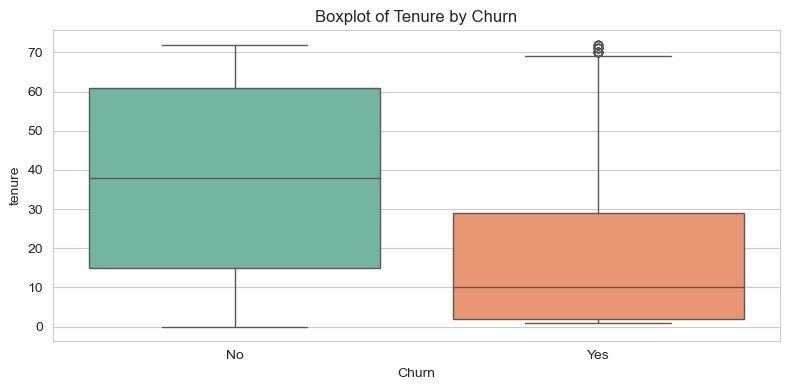

In [683]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set2')
plt.xlabel("Churn")
plt.title("Boxplot of Tenure by Churn")
plt.tight_layout()
plt.show()

### Tenure: The median tenure for customers who have left is around 10 months.


C:\Users\Owner\AppData\Local\Temp\ipykernel_23864\478710847.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




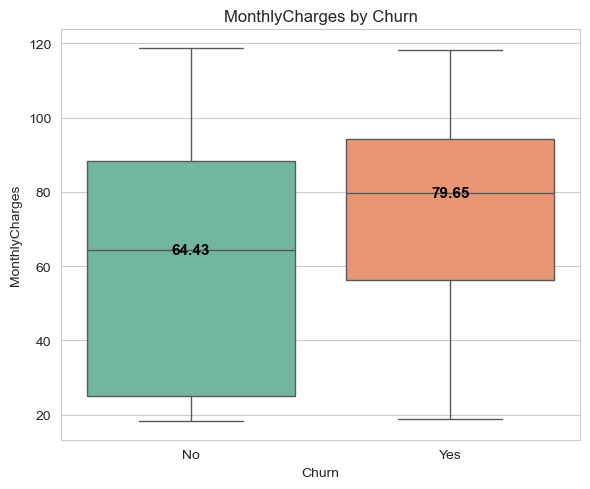

In [684]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 5))

# Draw boxplot
ax = sns.boxplot(y='MonthlyCharges', x='Churn', data=df, palette='Set2')

# Get median values
medians = df.groupby('Churn')['MonthlyCharges'].median()

# Add median labels
for tick, label in enumerate(ax.get_xticklabels()):
    churn_label = label.get_text()  # 'No' or 'Yes'
    median_val = medians.loc[churn_label]
    ax.text(tick, median_val, f'{median_val:.2f}', 
            horizontalalignment='center', color='black', weight='bold', va='center', fontsize=11)

plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")
plt.title("MonthlyCharges by Churn")
plt.tight_layout()
plt.show()


### MonthlyCharges: Customers who have churned, have high monthly charges. The median is above 75.

C:\Users\Owner\AppData\Local\Temp\ipykernel_23864\2281652872.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




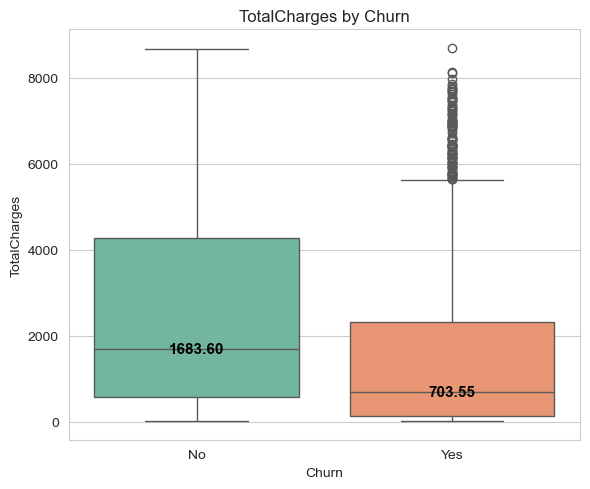

In [685]:
def new_func():
    # Ensure TotalCharges is numeric before plotting
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

#Plot Total charge by Churn
    plt.figure(figsize=(6, 5))
    sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='Set2')
    plt.xlabel("Churn")
    plt.ylabel("TotalCharges")
    plt.title("TotalCharges by Churn")
# Add median values on the boxplot
    ax = plt.gca()
    medians = df.groupby('Churn')['TotalCharges'].median()
    for tick, label in enumerate(ax.get_xticklabels()):
        churn_label = label.get_text()  # 'No' or 'Yes'
        median_val = medians.loc[churn_label]
        ax.text(tick, median_val, f'{median_val:.2f}', 
            horizontalalignment='center', color='black', weight='bold', va='center', fontsize=11)
    plt.tight_layout()
    plt.show()

new_func()

# Data Cleaning & Data Preprocessing

In [686]:
# drop the 'customerID' column as it is not needed for analysis
df.drop(columns=['customerID'], inplace=True)
# Check the first few rows of the modified dataset
print("\nFirst few rows after dropping 'customerID':")
df.head()


First few rows after dropping 'customerID':


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [687]:
# Changing the type of the TotalCharges variable.

df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

In [688]:
import seaborn as sns

def high_correlated_cols(dataframe, plot=False, corr_th=0.70):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import matplotlib.pyplot as plt
        sns.set(rc={"figure.figsize": (12, 12)})
        corr_values = corr.round(2)
        sns.heatmap(corr, cmap="RdBu", annot=corr_values)
        plt.show(block=True)
    return drop_list

In [689]:
# Binary Encoding for true binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
binary_map = {
    'gender': {'Female': 0, 'Male': 1},
    'Partner': {'No': 0, 'Yes': 1},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'No': 0, 'Yes': 1},
    'PaperlessBilling': {'No': 0, 'Yes': 1},
    'Churn': {'No': 0, 'Yes': 1}
}
for col in binary_cols:
    df[col] = df[col].map(binary_map[col])

# One-Hot Encoding for multi-class categorical columns
multi_class_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Check the first few rows after encoding
print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False                    

In [690]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [691]:
# Check for missing values again after conversion
print("\nMissing values after conversion:")
print(df.isnull().sum())


Missing values after conversion:
gender                                    0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           

In [692]:
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
488,0,0,1,1,0,0,1,52.55,NaN,0,...,True,False,True,False,False,False,True,False,False,False
753,1,0,0,1,0,1,0,20.25,NaN,0,...,False,True,False,True,False,False,True,False,False,True
936,0,0,1,1,0,1,0,80.85,NaN,0,...,False,False,True,False,True,False,True,False,False,True
1082,1,0,1,1,0,1,0,25.75,NaN,0,...,False,True,False,True,False,False,True,False,False,True
1340,0,0,1,1,0,0,0,56.05,NaN,0,...,True,False,True,False,False,False,True,True,False,False
3331,1,0,1,1,0,1,0,19.85,NaN,0,...,False,True,False,True,False,False,True,False,False,True
3826,1,0,1,1,0,1,0,25.35,NaN,0,...,False,True,False,True,False,False,True,False,False,True
4380,0,0,1,1,0,1,0,20.00,NaN,0,...,False,True,False,True,False,False,True,False,False,True
5218,1,0,1,1,0,1,1,19.70,NaN,0,...,False,True,False,True,False,True,False,False,False,True
6670,0,0,1,1,0,1,0,73.35,NaN,0,...,True,False,True,False,False,False,True,False,False,True


In [693]:
# Drop rows where 'TotalCharges' is missing (NaN)
df = df[df['TotalCharges'].notna()]
plot_df = plot_df[plot_df['TotalCharges'].notna()]

In [694]:
# Save the cleaned and updated dataset to a new CSV file
df.to_csv('data/Telco-Customer-Churn-cleaned.csv', index=False)

In [695]:
# Calculate Pearson correlation for only numeric columns in df
numeric_df = df.select_dtypes(include=[np.number])
pearson_corr = numeric_df.corr(method='pearson')
print("Pearson correlation matrix (numeric columns):")
print(pearson_corr)

Pearson correlation matrix (numeric columns):
                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001819 -0.001379    0.010349  0.005285   
SeniorCitizen    -0.001819       1.000000  0.016957   -0.210550  0.015683   
Partner          -0.001379       0.016957  1.000000    0.452269  0.381912   
Dependents        0.010349      -0.210550  0.452269    1.000000  0.163386   
tenure            0.005285       0.015683  0.381912    0.163386  1.000000   
PhoneService     -0.007515       0.008392  0.018397   -0.001078  0.007877   
PaperlessBilling -0.011902       0.156258 -0.013957   -0.110131  0.004823   
MonthlyCharges   -0.013779       0.219874  0.097825   -0.112343  0.246862   
TotalCharges      0.000048       0.102411  0.319072    0.064653  0.825880   
Churn            -0.008545       0.150541 -0.149982   -0.163128 -0.354049   

                  PhoneService  PaperlessBilling  MonthlyCharges  \
gender               -0.007515        

In [696]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


C:\Users\Owner\AppData\Local\Temp\ipykernel_23864\102737403.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Owner\AppData\Local\Temp\ipykernel_23864\102737403.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\Owner\AppData\Local\Temp\ipykernel_23864\102737403.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




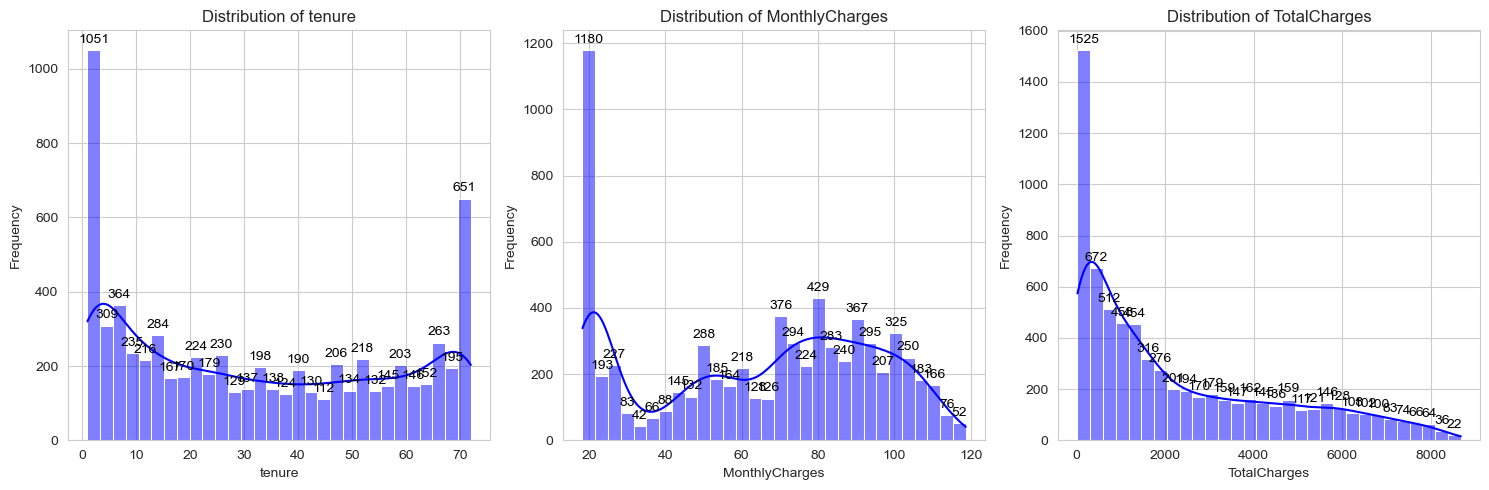

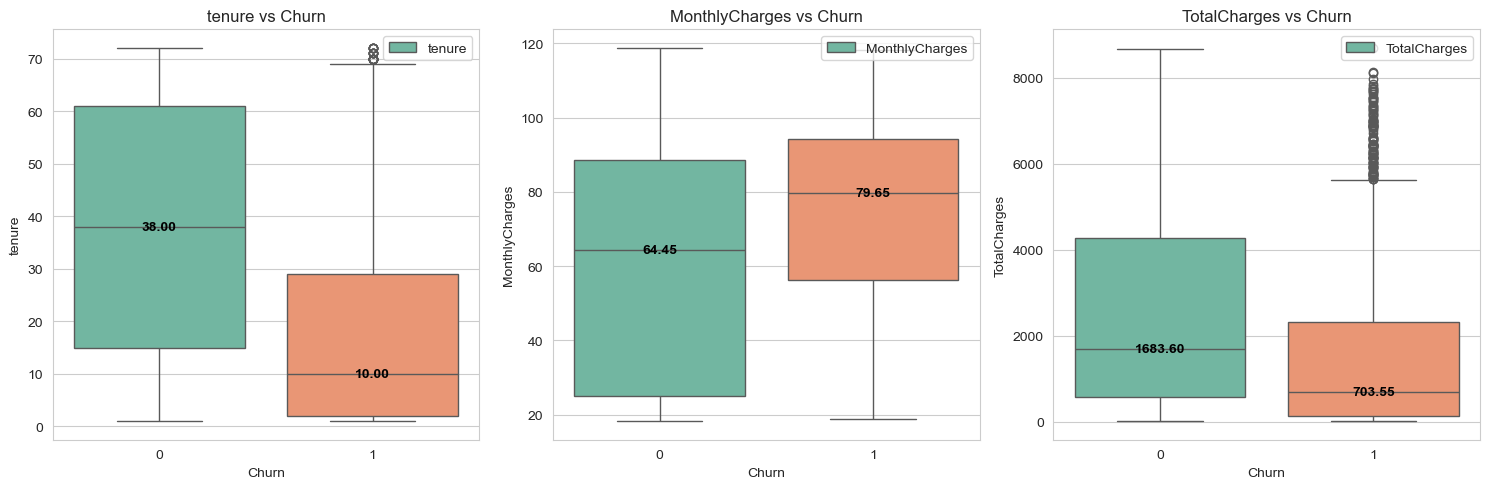

In [719]:
#visualize the distribution of numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df[col], kde=True, color='blue', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    # Add value labels on top of each bar for histogram
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', 
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3), textcoords='offset points')
plt.tight_layout()
# Visualize the relationship between numerical features and churn
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel('Churn')
    # Add median value labels to each box
    medians = df.groupby('Churn')[col].median()
    ax = plt.gca()
    for tick, label in enumerate(ax.get_xticklabels()):
        churn_label = label.get_text()
        median_val = medians.loc[int(churn_label) if churn_label.isdigit() else churn_label]
        ax.text(tick, median_val, f'{median_val:.2f}',
                horizontalalignment='center', color='black', weight='bold', va='center', fontsize=10)
    plt.ylabel(col)
    plt.legend([col], loc='upper right')
plt.tight_layout()
plt.show()

## Explanations :
Tenure
Many customers are very new (low tenure), but a large portion also has very high tenure.
Customers who churn tend to have short tenure (around 10 months), while loyal customers stay much longer (median ~38 months).

Monthly Charges
Churned customers tend to pay higher monthly charges (median $80) than non-churned customers ($64).
Higher pricing may contribute to customer dissatisfaction and churn.

Total Charges
Total charges are strongly linked to tenure.
Non-churned customers have significantly higher total charges because they have stayed longer.
Churned customers have lower total charges due to short tenure.

Overall Churn Pattern
Newer customers (short tenure) with higher monthly bills are more likely to churn.
Long-term customers who have accumulated high total charges are less likely to churn.

## Outlierdetection 



**Objective:**
Apply and compare multiple machine learning models (Logistic Regression, Random Forest, XGBoost, SVM) using different feature sets (original, PCA, LDA).

In [698]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   bool   
 11  MultipleL

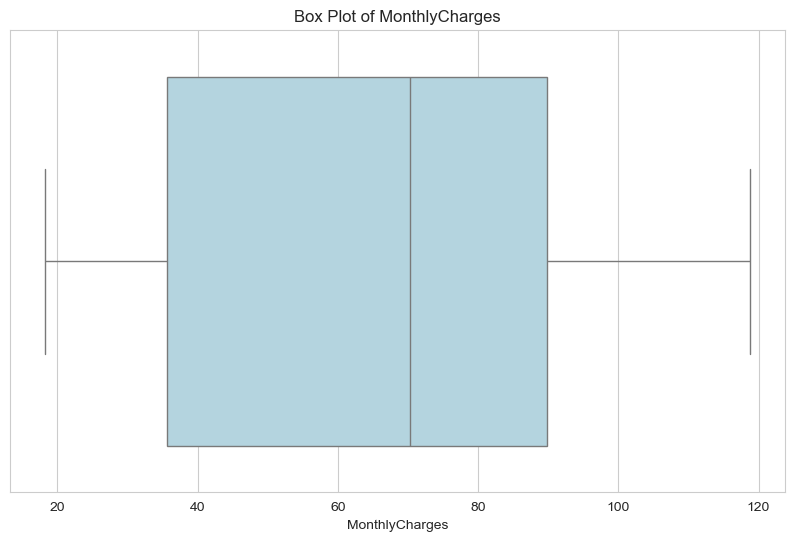

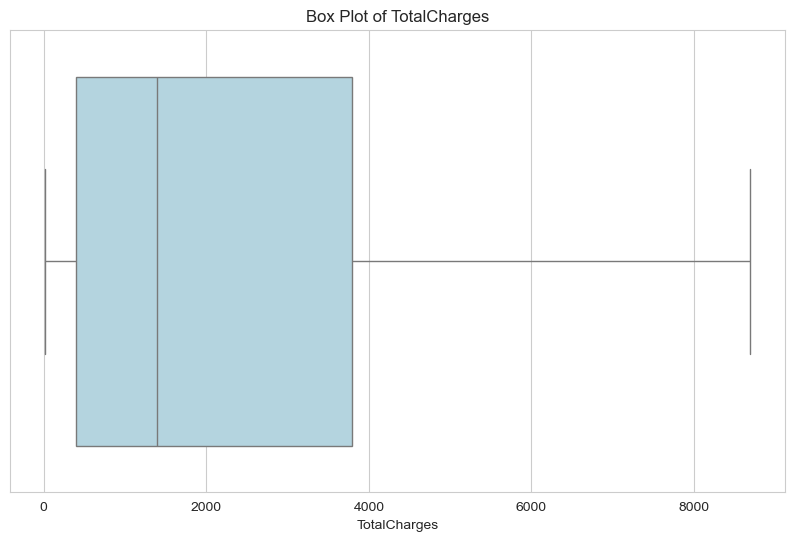

In [699]:
# Outlier Detection and Visualization
def plot_outliers(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column], color='lightblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.show()
# Plot outliers for 'MonthlyCharges' and 'TotalCharges'
plot_outliers(df, 'MonthlyCharges')
plot_outliers(df, 'TotalCharges')

In [700]:
# Outlier Detection using IQR for 'MonthlyCharges', 'TotalCharges', and 'tenure'
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers detected")
    return outliers

outlier_columns = ['MonthlyCharges', 'TotalCharges', 'tenure']
outliers_dict = {col: detect_outliers_iqr(df, col) for col in outlier_columns}

MonthlyCharges: 0 outliers detected
TotalCharges: 0 outliers detected
tenure: 0 outliers detected


# Data Preprocessing 

In [701]:
#train-test split
from sklearn.model_selection import train_test_split
# Define features and target variable
X = df.drop(columns=['Churn'])
y = df['Churn']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
# Check the shapes of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (5274, 30) (5274,)
Testing set shape: (1758, 30) (1758,)


In [702]:
# Save the training and testing sets to CSV files
X_train.to_csv('data/X_train.csv', index=False)
X_test.to_csv('data/X_test.csv', index=False)
y_train.to_csv('data/y_train.csv', index=False)
y_test.to_csv('data/y_test.csv', index=False)

In [703]:
from sklearn.preprocessing import StandardScaler

# Standardized features (mean=0, std=1) using StandardScaler
scaler = StandardScaler()
X_train_scaled_array = scaler.fit_transform(X_train)
X_test_scaled_array = scaler.transform(X_test)

# Convert to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled_array, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled_array, columns=X_test.columns)

print('First 5 rows of X_train_scaled:')
print(X_train_scaled.head())

First 5 rows of X_train_scaled:
     gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0  0.998863      -0.440481  1.030812    1.526285 -0.550434      0.329316   
1  0.998863      -0.440481 -0.970109   -0.655186 -1.283779      0.329316   
2  0.998863      -0.440481 -0.970109   -0.655186  0.671808      0.329316   
3 -1.001138      -0.440481  1.030812   -0.655186  0.427360      0.329316   
4  0.998863      -0.440481 -0.970109   -0.655186 -1.283779      0.329316   

   PaperlessBilling  MonthlyCharges  TotalCharges  \
0         -1.215409        1.162877     -0.179659   
1          0.822768       -0.305269     -0.984606   
2          0.822768        0.321096      0.624738   
3         -1.215409        0.713817      0.560688   
4          0.822768       -0.638336     -0.989019   

   MultipleLines_No phone service  ...  TechSupport_Yes  \
0                       -0.329316  ...         1.547198   
1                       -0.329316  ...        -0.646330   
2              

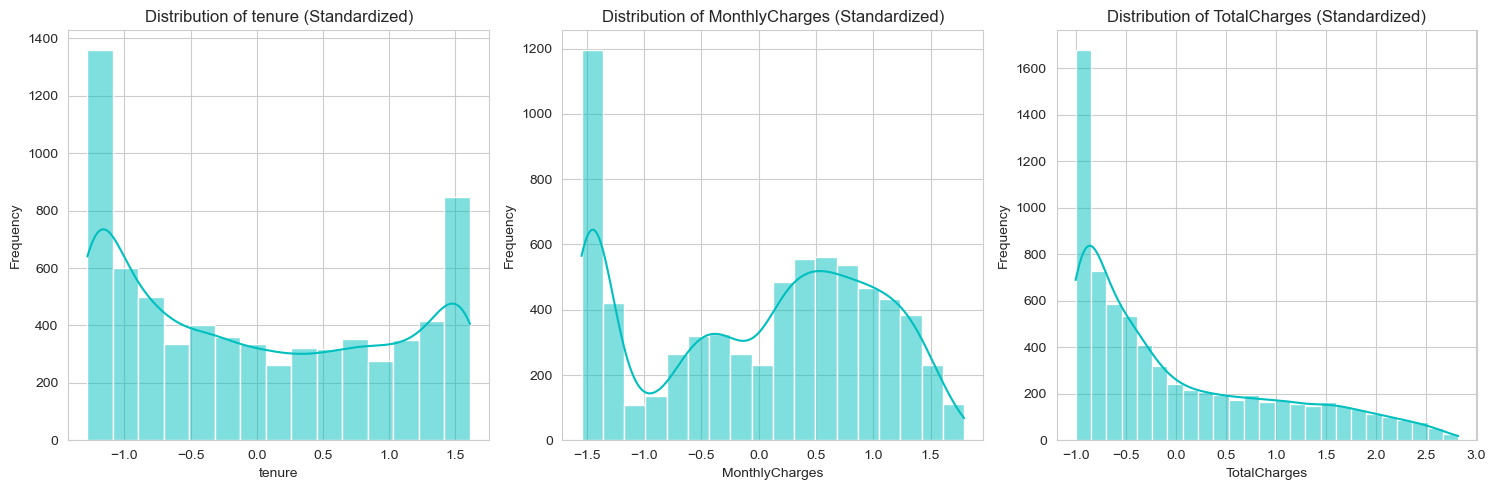

In [704]:
# Standardize the numerical columns
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                      columns=num_cols)

# Plot the distribution of each standardized numerical feature
plt.figure(figsize=(15, 5))
for i, feat in enumerate(numerical_cols, 1):
    plt.subplot(1, 3, i)
    sns.histplot(df_std[feat], kde=True, color='c')
    plt.title(f'Distribution of {feat} (Standardized)')
    plt.xlabel(feat)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [705]:
# Save the scaled training and testing data to CSV files
X_train_scaled.to_csv('data/X_train_scaled.csv', index=False)
X_test_scaled.to_csv('data/X_test_scaled.csv', index=False)

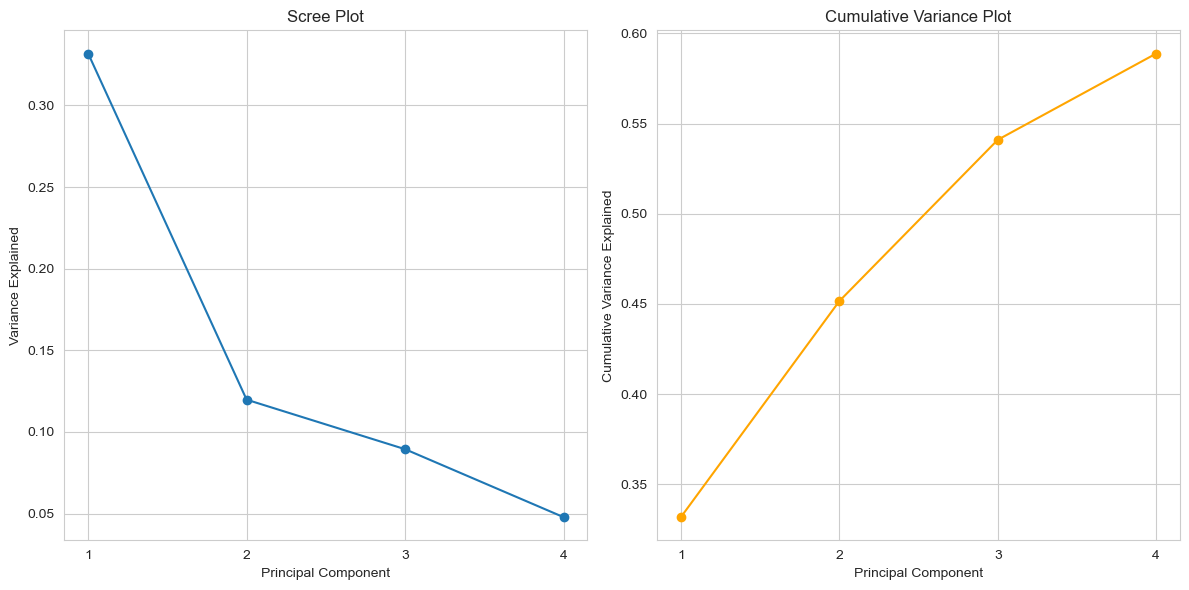

In [706]:
def plot_scree_and_cumulative_variance(pca):
    """Plot Scree Plot and Cumulative Variance Plot for PCA components."""
    plt.figure(figsize=(12, 6))
    
    # Scree Plot
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
    plt.title('Scree Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Variance Explained')
    plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
    
    # Cumulative Variance Plot
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='orange')
    plt.title('Cumulative Variance Plot')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Variance Explained')
    plt.xticks(range(1, len(cumulative_variance) + 1))
    
    plt.tight_layout()
    plt.show()

plot_scree_and_cumulative_variance(pca)

In [707]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
import pandas as pd

# Use the scaled feature sets from previous cells
# X_train_scaled and X_test_scaled are already defined

# PCA: keep exactly 4 components
pca = PCA(n_components=4)
X_train_pca_array = pca.fit_transform(X_train_scaled)
X_test_pca_array = pca.transform(X_test_scaled)

# Show explained variance ratio and cumulative explained variance for PCA
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)
print("Explained variance ratio (PCA):", explained_var)
print("Cumulative explained variance (PCA):", cum_explained_var)

# Save PCA-transformed data as DataFrames
X_train_pca = pd.DataFrame(X_train_pca_array, columns=[f'PC{i+1}' for i in range(X_train_pca_array.shape[1])])
X_test_pca = pd.DataFrame(X_test_pca_array, columns=[f'PC{i+1}' for i in range(X_test_pca_array.shape[1])])

# LDA: n_components <= n_classes - 1
n_classes = len(np.unique(y_train))
lda = LDA(n_components=min(n_classes-1, X_train_scaled.shape[1]))
X_train_lda_array = lda.fit_transform(X_train_scaled, y_train)
X_test_lda_array = lda.transform(X_test_scaled)

# Save LDA-transformed data as DataFrames
X_train_lda = pd.DataFrame(X_train_lda_array, columns=[f'LD{i+1}' for i in range(X_train_lda_array.shape[1])])
X_test_lda = pd.DataFrame(X_test_lda_array, columns=[f'LD{i+1}' for i in range(X_test_lda_array.shape[1])])

# Save all transformed datasets to CSV
X_train_pca.to_csv('data/X_train_pca.csv', index=False)
X_test_pca.to_csv('data/X_test_pca.csv', index=False)
X_train_lda.to_csv('data/X_train_lda.csv', index=False)
X_test_lda.to_csv('data/X_test_lda.csv', index=False)

print('PCA and LDA applied to scaled features. Transformed datasets saved as CSV files.')
print('PCA components (X_train_pca):', X_train_pca.shape[1])
print('LDA components (X_train_lda):', X_train_lda.shape[1])


Explained variance ratio (PCA): [0.33179926 0.11978905 0.08946149 0.04784991]
Cumulative explained variance (PCA): [0.33179926 0.45158831 0.54104981 0.58889972]
PCA and LDA applied to scaled features. Transformed datasets saved as CSV files.
PCA components (X_train_pca): 4
LDA components (X_train_lda): 1


# Modeling: Classification Algorithms

In this section, we will train and evaluate four different classification models:
- Logistic Regression (simple, fast baseline)
- Random Forest
- XGBoost
- Support Vector Machine (SVM)

Each model will be trained and evaluated on:
- Original scaled features
- PCA-transformed features
- LDA-transformed features

This approach allows us to compare model performance before and after dimensionality reduction.

In [708]:
# Install xgboost if not already installed
%pip install xgboost --quiet

Note: you may need to restart the kernel to use updated packages.


**Explanation:**

This cell ensures that the `xgboost` library is installed in your environment. XGBoost is a powerful gradient boosting library used for classification and regression tasks. Installing it here guarantees that the following modeling cells using XGBoost will run without import errors.

In [709]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],      # Regularization parameter
    'gamma': ['scale', 0.01, 0.1, 1],  # Kernel coefficient for 'rbf'
    'kernel': ['rbf']
}

# Function to run GridSearchCV and print results for SVM
def run_svm_grid_search(X_train, y_train, X_test, y_test, feature_type):
    print(f"\n----- SVM ({feature_type}) -----")
    grid = GridSearchCV(
        estimator=SVC(probability=True, random_state=42),
        param_grid=param_grid_svm,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    print("Best Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)
    
    y_pred = grid.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# 1️⃣ Original Scaled Features
run_svm_grid_search(X_train_scaled, y_train, X_test_scaled, y_test, "Original Scaled Features")

# 2️⃣ PCA Features
run_svm_grid_search(X_train_pca, y_train, X_test_pca, y_test, "PCA Features")

# 3️⃣ LDA Features
run_svm_grid_search(X_train_lda, y_train, X_test_lda, y_test, "LDA Features")



----- SVM (Original Scaled Features) -----
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Accuracy: 0.8026155381889799
Test Accuracy: 0.7963594994311718
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1291
           1       0.65      0.51      0.57       467

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.79      0.80      0.79      1758


----- SVM (PCA Features) -----
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best CV Accuracy: 0.7918071530706764
Test Accuracy: 0.7872582480091013
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1291
           1       0.65      0.43      0.52       467

    accuracy                           0.79      175

**Explanation:**

This cell trains Support Vector Machine (SVM) classifiers on the original standardized features, PCA features, and LDA features. It prints the accuracy and classification report for each, so you can evaluate SVM's effectiveness with different feature transformations.

In [710]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Function to run GridSearchCV and print results for XGBoost
def run_xgb_grid_search(X_train, y_train, X_test, y_test, feature_type):
    print(f"\n----- XGBoost ({feature_type}) -----")
    grid = GridSearchCV(
        estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
        param_grid=param_grid_xgb,
        scoring='accuracy',
        cv=5,
        verbose=1,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    print("Best Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)
    
    y_pred = grid.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# 1️⃣ Original Scaled Features
run_xgb_grid_search(X_train_scaled, y_train, X_test_scaled, y_test, "Original Scaled Features")

# 2️⃣ PCA Features
run_xgb_grid_search(X_train_pca, y_train, X_test_pca, y_test, "PCA Features")

# 3️⃣ LDA Features
run_xgb_grid_search(X_train_lda, y_train, X_test_lda, y_test, "LDA Features")



----- XGBoost (Original Scaled Features) -----
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Owner\anaconda3\envs\DataScience\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:28:26] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best CV Accuracy: 0.8084933946059696
Test Accuracy: 0.7963594994311718
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1291
           1       0.64      0.53      0.58       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758


----- XGBoost (PCA Features) -----
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\Owner\anaconda3\envs\DataScience\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:28:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV Accuracy: 0.7883950106567623
Test Accuracy: 0.7866894197952219
              precision    recall  f1-score   support

           0       0.82      0.92      0.86      1291
           1       0.65      0.43      0.51       467

    accuracy                           0.79      1758
   macro avg       0.73      0.67      0.69      1758
weighted avg       0.77      0.79      0.77      1758


----- XGBoost (LDA Features) -----
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best CV Accuracy: 0.8045137908396809
Test Accuracy: 0.8014789533560864
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1291
           1       0.67      0.49      0.57       467

    accuracy              

c:\Users\Owner\anaconda3\envs\DataScience\Lib\site-packages\xgboost\training.py:183: UserWarning:

[19:28:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.




**Explanation:**

This cell applies the XGBoost classifier to the original standardized features, PCA features, and LDA features. For each, it outputs the accuracy and classification report, allowing you to compare XGBoost's performance across different feature sets.

In [711]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Function to run GridSearchCV and print results
def run_rf_grid_search(X_train, y_train, X_test, y_test, feature_type):
    print(f"\n----- Random Forest ({feature_type}) -----")
    grid = GridSearchCV(
        estimator=RandomForestClassifier(random_state=42),
        param_grid=param_grid_rf,
        scoring='accuracy',
        cv=10,
        verbose=1,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    print("Best Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)
    
    y_pred = grid.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# 1️⃣ Original Scaled Features
run_rf_grid_search(X_train_scaled, y_train, X_test_scaled, y_test, "Original Scaled Features")

# 2️⃣ PCA Features
run_rf_grid_search(X_train_pca, y_train, X_test_pca, y_test, "PCA Features")

# 3️⃣ LDA Features
run_rf_grid_search(X_train_lda, y_train, X_test_lda, y_test, "LDA Features")



----- Random Forest (Original Scaled Features) -----
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Accuracy: 0.806980981542177
Test Accuracy: 0.7963594994311718
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1291
           1       0.65      0.50      0.56       467

    accuracy                           0.80      1758
   macro avg       0.74      0.70      0.72      1758
weighted avg       0.78      0.80      0.79      1758


----- Random Forest (PCA Features) -----
Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV Accuracy: 0.7893393134379851
Test Accuracy: 0.785551763367463
              precision    recall  f1-score   support

           0       0.82      0.91      0.86    

**Explanation:**

This cell fits Random Forest classifiers to the original standardized features, PCA features, and LDA features. It prints the accuracy and classification report for each, helping you assess how Random Forest performs with different feature representations.

In [712]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [1000]
}

# Function to run GridSearchCV and print results
def run_grid_search(X_train, y_train, X_test, y_test, feature_type):
    print(f"\n----- Logistic Regression ({feature_type}) -----")
    grid = GridSearchCV(
        estimator=LogisticRegression(random_state=42),
        param_grid=param_grid,
        scoring='accuracy',
        cv=10,
        verbose=0,
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    
    print("Best Parameters:", grid.best_params_)
    print("Best CV Accuracy:", grid.best_score_)
    
    y_pred = grid.predict(X_test)
    print("Test Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))

# 1️⃣ Original Scaled Features
run_grid_search(X_train_scaled, y_train, X_test_scaled, y_test, "Original Scaled Features")

# 2️⃣ PCA Features
run_grid_search(X_train_pca, y_train, X_test_pca, y_test, "PCA Features")

# 3️⃣ LDA Features
run_grid_search(X_train_lda, y_train, X_test_lda, y_test, "LDA Features")



----- Logistic Regression (Original Scaled Features) -----
Best Parameters: {'C': 100, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.803753018802829
Test Accuracy: 0.8014789533560864
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1291
           1       0.64      0.57      0.60       467

    accuracy                           0.80      1758
   macro avg       0.75      0.73      0.74      1758
weighted avg       0.80      0.80      0.80      1758


----- Logistic Regression (PCA Features) -----
Best Parameters: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy: 0.7910492496118682
Test Accuracy: 0.7901023890784983
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1291
           1       0.63      0.49      0.56       467

    accuracy                           0.79      1758
   macro avg       0.73      0.70      0.71 

**Explanation:**

This cell trains and evaluates Logistic Regression models on three different feature sets: the original standardized features, PCA-transformed features, and LDA-transformed features. For each, it prints the accuracy and classification report, allowing you to compare model performance before and after dimensionality reduction.

In [713]:
from sklearn.metrics import accuracy_score, f1_score

import IPython.display as disp

# Prepare a summary table for best results
summary_rows = []
methods = ['Random Forest', 'SVM', 'Logistic Regression', 'XGBOOST']

# Collect accuracy and F1 for each method and dataset

# Helper to get acc/f1 for predictions
def get_metrics(y_true, y_pred):
    return f"Acc: {accuracy_score(y_true, y_pred):.3f}, F1: {f1_score(y_true, y_pred):.3f}"

# Parameters (update if you did hyperparameter tuning)
params = {
    'Random Forest': "{'n_estimators': 100, 'random_state': 42}",
    'SVM': "{'kernel': 'rbf', 'random_state': 42}",
    'Logistic Regression': "{'max_iter': 1000, 'random_state': 42}",
    'XGBOOST': "{'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}"
}

# Predictions from previous cells
results = {
    'Random Forest': [y_pred_rf, y_pred_rf_pca, y_pred_rf_lda],
    'SVM': [y_pred_svm, y_pred_svm_pca, y_pred_svm_lda],
    'Logistic Regression': [y_pred_lr, y_pred_lr_pca, y_pred_lr_lda],
    'XGBOOST': [y_pred_xgb, y_pred_xgb_pca, y_pred_xgb_lda]
}

for method in methods:
    row = {
        'Method': method,
        'Parameters': params[method],
        'Standardized': get_metrics(y_test, results[method][0]),
        'After PCA': get_metrics(y_test, results[method][1]),
        'After LDA': get_metrics(y_test, results[method][2])
    }
    summary_rows.append(row)

summary_df = pd.DataFrame(summary_rows)
disp.display(summary_df.style.set_table_attributes('border="1" class="dataframe"').set_caption('Best Results for Each Method and Dataset'))

,Method,Parameters,Standardized,After PCA,After LDA
0,Random Forest,"{'n_estimators': 100, 'random_state': 42}","Acc: 0.790, F1: 0.555","Acc: 0.772, F1: 0.532","Acc: 0.741, F1: 0.506"
1,SVM,"{'kernel': 'rbf', 'random_state': 42}","Acc: 0.792, F1: 0.557","Acc: 0.787, F1: 0.525","Acc: 0.801, F1: 0.578"
2,Logistic Regression,"{'max_iter': 1000, 'random_state': 42}","Acc: 0.808, F1: 0.615","Acc: 0.790, F1: 0.556","Acc: 0.799, F1: 0.591"
3,XGBOOST,"{'use_label_encoder': False, 'eval_metric': 'logloss', 'random_state': 42}","Acc: 0.770, F1: 0.535","Acc: 0.766, F1: 0.528","Acc: 0.798, F1: 0.559"


**Explanation:**

This cell summarizes the best results for each model and feature set (Standardized, After PCA, After LDA) in a single table. It displays the accuracy, F1 score, and best parameters for each method, making it easy to compare model performance and select the best approach for customer churn prediction.

Deployment / Next Steps (Optional)

**Objective:**
Discuss potential deployment strategies, business integration, or further improvements for the churn prediction model.